In [17]:
import numpy as np
from matplotlib import pyplot as plt
import scipy.ndimage as imfilter
import pandas as pd
from crop_image import crop_image

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [8]:
path_wiki = 'data/watches/ds1_kaggle/cleandata.csv'
path_imdb = 'data/watches/ds1_kaggle/images/'

In [12]:
df = pd.read_csv(path_wiki, index_col=0)
df.head()

,image_name,price
0,0.jpg,2780.00
1,1.jpg,449.95
2,2.jpg,399.00
3,3.jpg,349.00
4,4.jpg,549.00


In [13]:
### TIME INFORMATION: needs X,X Minutes to run
all_image_data = []
all_label_data = []
for index, row in df_test.iterrows():
    #ladeprozess anzeigen
    if index % 250 == 0:
        print(index)
    img = np.asarray(crop_image(path_imdb + row["image_name"], (255,255), False).convert('L'))/255 # .flatten() #
    img = imfilter.sobel(img).flatten()
    all_image_data.append(img)
    all_label_data.append(row["price"])

0
250
500
750
1000
1250
1500
1750
2000
2250
2500


In [16]:
### TIME INFORMATION: needs 29,1 Minutes to finish
X_train, X_test, y_train, y_test = train_test_split(all_image_data, all_label_data, test_size=0.1, random_state=12)
rf = RandomForestRegressor(n_estimators=100, max_depth=10, verbose=2)
rf.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 100


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   17.3s remaining:    0.0s


building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed: 29.1min finished


RandomForestRegressor(max_depth=10, verbose=2)

In [34]:
y_pred = rf.predict(X_test)
y_pred_train = rf.predict(X_train)
print(f"The R2 score of the model on the Test Data is: {r2_score(y_test, y_pred)}")
print(f"The R2 score of the model on the Train Data is: {r2_score(y_train, y_pred_train)}")

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


The R2 score of the model on the Test Data is: 0.32916981418427627
The R2 score of the model on the Train Data is: 0.738029114841039


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


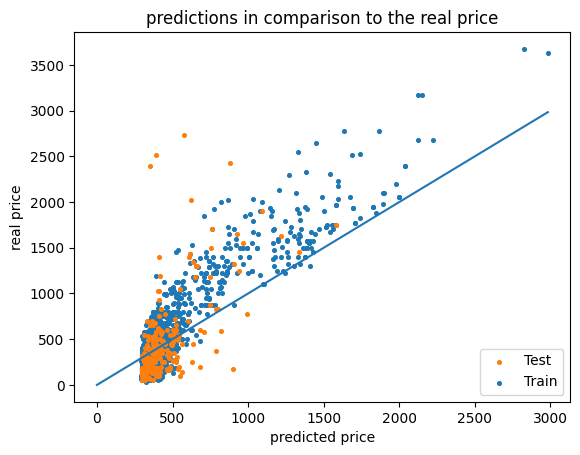

In [30]:
fig, ax = plt.subplots()

train = ax.scatter(y_pred_train, y_train, s=7, label ="Train")
test = ax.scatter(y_pred, y_test, s=7, label= "Test")

ax.plot([0,max(y_pred_train)], [0,max(y_pred_train)])
ax.set_ylabel('real price')
ax.set_xlabel('predicted price')
ax.set_title('predictions in comparison to the real price')

ax.legend(handles=[test, train], loc='lower right')

plt.show()

## Apply other Data on this Model